# DATA620: Assignment 6

## Homework Team 3: David Simbandumwe, Eric Lehmphul and Lidiia Tronina

### Data

For this project, we will be working with Davis Southern Club Women network dataset obtained from a previously collected data by Davis et al in 1930s. It represent observed attendance of 18 southern women at 14 social events. It's a simple 2-node network.

* [Brief Description](http://vlado.fmf.uni-lj.si/pub/networks/data/ucinet/ucidata.htm#davis)
* [Dataset](http://vlado.fmf.uni-lj.si/pub/networks/data/Ucinet/davis.dat)
* [Python code to create dataset](https://networkx.github.io/documentation/stable/auto_examples/algorithms/plot_davis_club.html)

The objective of this week's assignment is:

* Load a dataset
* Create basic analysis
* Explore the relationship between (1) the women, and (2) the social events

### Load Required Packages

In [1]:
import networkx as nx
import numpy as np
import matplotlib as mpl
from networkx import algorithms 
import matplotlib.pyplot as plt
import pandas as pd
import plotly.express as px
import seaborn as sns
import networkx.algorithms.bipartite as bipartite

### Exploratory Data Analysis

We have two kinds of nodes: women, and events.

In [2]:
# Import data
G = nx.davis_southern_women_graph()
women = G.graph["top"]
clubs = G.graph["bottom"]
women

['Evelyn Jefferson',
 'Laura Mandeville',
 'Theresa Anderson',
 'Brenda Rogers',
 'Charlotte McDowd',
 'Frances Anderson',
 'Eleanor Nye',
 'Pearl Oglethorpe',
 'Ruth DeSand',
 'Verne Sanderson',
 'Myra Liddel',
 'Katherina Rogers',
 'Sylvia Avondale',
 'Nora Fayette',
 'Helen Lloyd',
 'Dorothy Murchison',
 'Olivia Carleton',
 'Flora Price']

In [3]:
clubs

['E1',
 'E2',
 'E3',
 'E4',
 'E5',
 'E6',
 'E7',
 'E8',
 'E9',
 'E10',
 'E11',
 'E12',
 'E13',
 'E14']

In [4]:
print("Biadjacency matrix")
print(bipartite.biadjacency_matrix(G, women, clubs))

Biadjacency matrix
  (0, 0)	1
  (0, 1)	1
  (0, 2)	1
  (0, 3)	1
  (0, 4)	1
  (0, 5)	1
  (0, 7)	1
  (0, 8)	1
  (1, 0)	1
  (1, 1)	1
  (1, 2)	1
  (1, 4)	1
  (1, 5)	1
  (1, 6)	1
  (1, 7)	1
  (2, 1)	1
  (2, 2)	1
  (2, 3)	1
  (2, 4)	1
  (2, 5)	1
  (2, 6)	1
  (2, 7)	1
  (2, 8)	1
  (3, 0)	1
  (3, 2)	1
  :	:
  (12, 7)	1
  (12, 8)	1
  (12, 9)	1
  (12, 11)	1
  (12, 12)	1
  (12, 13)	1
  (13, 5)	1
  (13, 6)	1
  (13, 8)	1
  (13, 9)	1
  (13, 10)	1
  (13, 11)	1
  (13, 12)	1
  (13, 13)	1
  (14, 6)	1
  (14, 7)	1
  (14, 9)	1
  (14, 10)	1
  (14, 11)	1
  (15, 7)	1
  (15, 8)	1
  (16, 8)	1
  (16, 10)	1
  (17, 8)	1
  (17, 10)	1


### Degree Centrality

In [5]:
womenDegree = nx.degree(G, women, weight='weight') 
clubsDegree = nx.degree(G, clubs)

In [6]:
#womenDegree
deg_w = dict(sorted(dict(womenDegree).items(), key=lambda item: item[1],reverse=True))
deg_w

{'Evelyn Jefferson': 8,
 'Theresa Anderson': 8,
 'Nora Fayette': 8,
 'Laura Mandeville': 7,
 'Brenda Rogers': 7,
 'Sylvia Avondale': 7,
 'Katherina Rogers': 6,
 'Helen Lloyd': 5,
 'Charlotte McDowd': 4,
 'Frances Anderson': 4,
 'Eleanor Nye': 4,
 'Ruth DeSand': 4,
 'Verne Sanderson': 4,
 'Myra Liddel': 4,
 'Pearl Oglethorpe': 3,
 'Dorothy Murchison': 2,
 'Olivia Carleton': 2,
 'Flora Price': 2}

In [7]:
#womenDegree
deg_c = dict(sorted(dict(clubsDegree).items(), key=lambda item: item[1],reverse=True))
deg_c

{'E8': 14,
 'E9': 12,
 'E7': 10,
 'E5': 8,
 'E6': 8,
 'E3': 6,
 'E12': 6,
 'E10': 5,
 'E4': 4,
 'E11': 4,
 'E1': 3,
 'E2': 3,
 'E13': 3,
 'E14': 3}

### Visualize the network

#### Entire Network

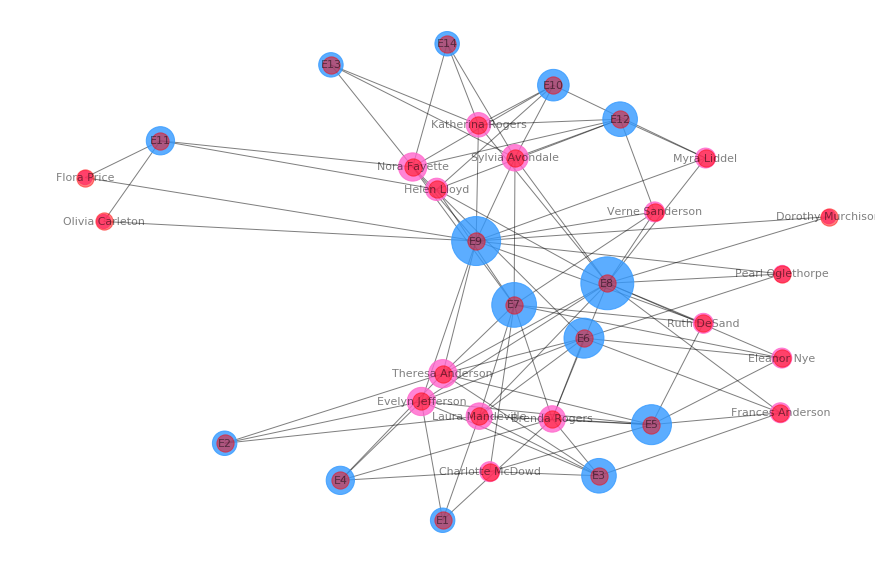

In [8]:
pos = nx.spring_layout(G)
plt.figure(1,figsize=(15,10)) 

nx.draw_networkx_nodes(G,pos,
                       nodelist=women,
                       node_color='#FF66CC',
                       node_size=[v * 100 for v in dict(womenDegree).values()],
                   alpha=0.8)
nx.draw_networkx_nodes(G,pos,
                       nodelist=clubs,
                       node_color='#3399FF',
                       node_size=[v * 200 for v in dict(clubsDegree).values()],
                   alpha=0.8)

# edges
nx.draw(G,pos,with_labels = True, font_size = 11, width=1.0,alpha=0.5)

#### Women Relationships

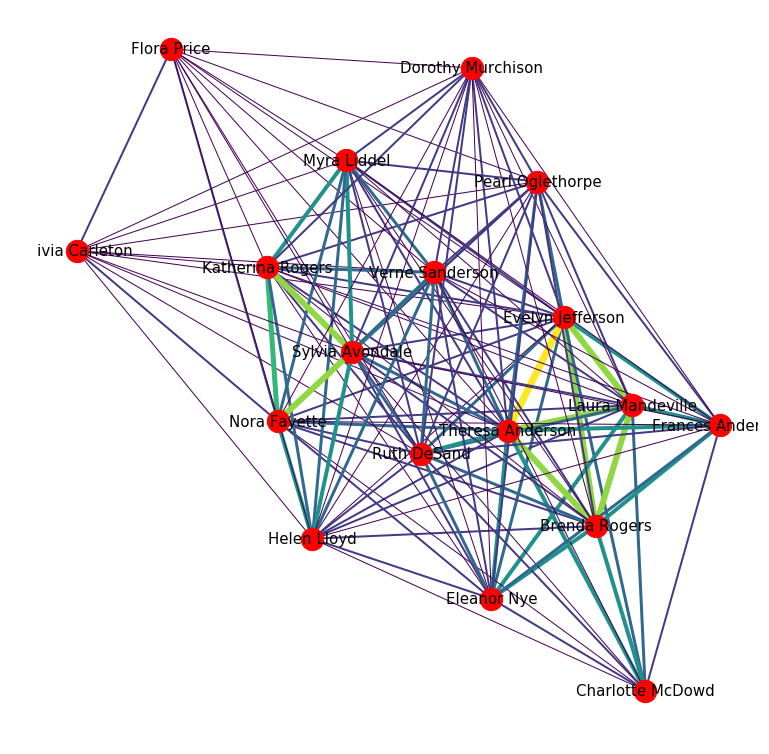

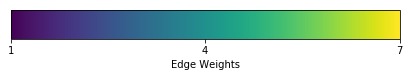

In [9]:
plt.figure(1,figsize=(10,10)) 

# Nodes represent women and edges represent the number of clubs the women share

W = bipartite.weighted_projected_graph(G, women)

weights=[edata['weight'] for f,t,edata in W.edges(data=True)]
pos1 = nx.spring_layout(W, random_state = 100)

nx.draw(W, pos1, with_labels = True, width=weights, edge_color=weights,node_size=500,font_size=15)

# Colorbar
fig = plt.figure()
ax = fig.add_axes([0.05, 0.80, 0.9, 0.1])

cb = mpl.colorbar.ColorbarBase(ax, orientation='horizontal', 
                               cmap='viridis',
                               norm=mpl.colors.Normalize(1,7),
                               ticks=[1, 4, 7],
                               label='Edge Weights')

In [10]:
W.degree()

DegreeView({'Evelyn Jefferson': 17, 'Laura Mandeville': 15, 'Theresa Anderson': 17, 'Brenda Rogers': 15, 'Charlotte McDowd': 11, 'Frances Anderson': 15, 'Eleanor Nye': 15, 'Pearl Oglethorpe': 16, 'Ruth DeSand': 17, 'Verne Sanderson': 17, 'Myra Liddel': 16, 'Katherina Rogers': 16, 'Sylvia Avondale': 17, 'Nora Fayette': 17, 'Helen Lloyd': 17, 'Dorothy Murchison': 16, 'Olivia Carleton': 12, 'Flora Price': 12})

The graph of women affiliations (nodes), in terms of club events (edges), is extremely well connected. Each woman is related to at least 11 out of 17 women.

Not all of the women are equally involved in club activities. There appears to be 2 subgroups within this network. 

#### Clubs

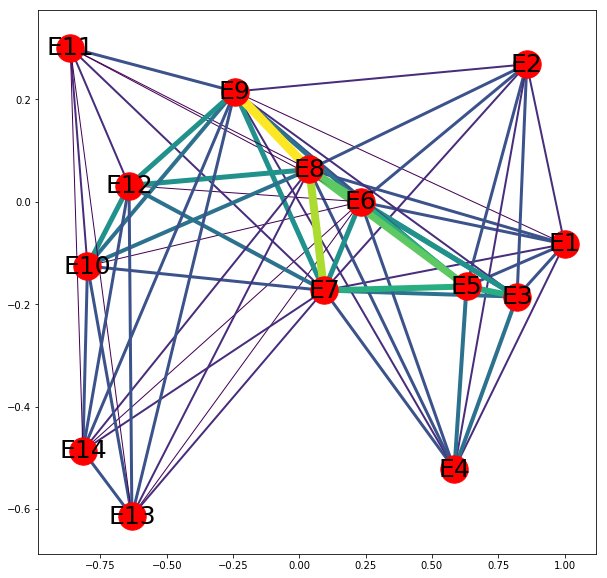

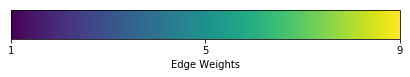

In [11]:
# Nodes represent club events and edges represent the number of women that attended both club events 

plt.figure(1,figsize=(10,10)) 
pos = nx.spring_layout(G, random_state = 100)

G2 = nx.davis_southern_women_graph()
women = G2.graph['bottom']
clubs = G2.graph['top']


clubs_graph = bipartite.weighted_projected_graph(G2, women)

clubs_graph.edges(data=True)
weights=[edata['weight'] for f,t,edata in clubs_graph.edges(data=True)]

nx.draw_networkx(clubs_graph, pos, with_labels = True, width=weights, edge_color=weights,node_size=750,font_size=25)

# Colorbar
fig = plt.figure()
ax = fig.add_axes([0.05, 0.80, 0.9, 0.1])

cb = mpl.colorbar.ColorbarBase(ax, orientation='horizontal', 
                               cmap='viridis',
                               norm=mpl.colors.Normalize(1,9),
                               ticks=[1, 5, 9],
                               label='Edge Weights')

In [12]:
clubs_graph.degree()

DegreeView({'E1': 8, 'E2': 8, 'E3': 8, 'E4': 8, 'E5': 8, 'E6': 13, 'E7': 13, 'E8': 13, 'E9': 13, 'E10': 8, 'E11': 8, 'E12': 8, 'E13': 8, 'E14': 8})

The club event graph is also highly connected with a minimum degree of 8 out of 13. 

# Analysis of Bipartite Graph
* project the bipartite graph on the women node
* calculate measures of centrality (Degrees, Closeness, Betweenness and Eigenvector)

In [13]:
G = nx.davis_southern_women_graph()
women = G.graph["top"]
clubs = G.graph["bottom"]

W = bipartite.weighted_projected_graph(G, women)

In [14]:
deg = nx.degree(W)
deg_w = nx.degree(W, weight='weight')
c = nx.closeness_centrality(W)
b=nx.betweenness_centrality(W)
e = nx.eigenvector_centrality(W, max_iter=100) 

In [15]:
df = pd.DataFrame(women, columns=['name'])

In [16]:
df['Degree'] = df['name'].map(dict(deg))
df['Degree_weight'] = df['name'].map(dict(deg_w))
df['Closeness'] = df['name'].map(dict(c))
df['Betweenness'] = df['name'].map(dict(b))
df['Eigenvector'] = df['name'].map(dict(e))
df.round(decimals=4)

name  Degree  Degree_weight  Closeness  Betweenness  \
0    Evelyn Jefferson      17             50     1.0000       0.0101   
1    Laura Mandeville      15             45     0.8947       0.0027   
2    Theresa Anderson      17             57     1.0000       0.0101   
3       Brenda Rogers      15             46     0.8947       0.0027   
4    Charlotte McDowd      11             24     0.7391       0.0000   
5    Frances Anderson      15             32     0.8947       0.0027   
6         Eleanor Nye      15             36     0.8947       0.0027   
7    Pearl Oglethorpe      16             31     0.9444       0.0053   
8         Ruth DeSand      17             40     1.0000       0.0101   
9     Verne Sanderson      17             38     1.0000       0.0101   
10        Myra Liddel      16             33     0.9444       0.0053   
11   Katherina Rogers      16             37     0.9444       0.0053   
12    Sylvia Avondale      17             46     1.0000       0.0101   
13       Nora Fayette      17             43     1.0000       0.0101   
14        Helen Lloyd      17             34     1.0000       0.0101   
15  Dorothy Murchison      16             24     0.9444       0.0053   
16    Olivia Carleton      12             14     0.7727       0.0000   
17        Flora Price      12             14     0.7727       0.0000   

    Eigenvector  
0        0.2535  
1        0.2310  
2        0.2535  
3        0.2310  
4        0.1725  
5        0.2310  
6        0.2310  
7        0.2432  
8        0.2535  
9        0.2535  
10       0.2432  
11       0.2432  
12       0.2535  
13       0.2535  
14       0.2535  
15       0.2432  
16       0.1876  
17       0.1876

In [17]:
fig = px.scatter(df, x="Closeness", y="Betweenness", size="Degree", color="Eigenvector", 
                    hover_name="name", width=1000, height=600, title="Davis Southern Club Women (measures of centrality)")
fig.show()

### Conclusions
There are several clusters of centrality measures
* The centrality measure can be divided into the following 4 groups (g1 - g4)
* g1 - overall low measures of connectivity and centrality
* g4 - high measures of connectivity and centrality

In [18]:
df_g1 = df[df['Closeness'] < 0.8]
df_g1

name  Degree  Degree_weight  Closeness  Betweenness  \
4   Charlotte McDowd      11             24   0.739130          0.0   
16   Olivia Carleton      12             14   0.772727          0.0   
17       Flora Price      12             14   0.772727          0.0   

    Eigenvector  
4      0.172527  
16     0.187639  
17     0.187639

In [19]:
import numpy as np
df_g2 = df[np.logical_and(df['Closeness'] > 0.8, df['Closeness'] < 0.9)]
df_g2

name  Degree  Degree_weight  Closeness  Betweenness  \
1  Laura Mandeville      15             45   0.894737     0.002674   
3     Brenda Rogers      15             46   0.894737     0.002674   
5  Frances Anderson      15             32   0.894737     0.002674   
6       Eleanor Nye      15             36   0.894737     0.002674   

   Eigenvector  
1     0.230973  
3     0.230973  
5     0.230973  
6     0.230973

In [20]:
df_g3 = df[np.logical_and(df['Closeness'] > 0.9, df['Closeness'] < 0.95)]
df_g3

name  Degree  Degree_weight  Closeness  Betweenness  \
7    Pearl Oglethorpe      16             31   0.944444     0.005348   
10        Myra Liddel      16             33   0.944444     0.005348   
11   Katherina Rogers      16             37   0.944444     0.005348   
15  Dorothy Murchison      16             24   0.944444     0.005348   

    Eigenvector  
7      0.243157  
10     0.243157  
11     0.243157  
15     0.243157

In [21]:
df_g4 = df[np.logical_and(df['Closeness'] > 0.95, df['Closeness'] < 1.2)]
df_g4

name  Degree  Degree_weight  Closeness  Betweenness  \
0   Evelyn Jefferson      17             50        1.0     0.010122   
2   Theresa Anderson      17             57        1.0     0.010122   
8        Ruth DeSand      17             40        1.0     0.010122   
9    Verne Sanderson      17             38        1.0     0.010122   
12   Sylvia Avondale      17             46        1.0     0.010122   
13      Nora Fayette      17             43        1.0     0.010122   
14       Helen Lloyd      17             34        1.0     0.010122   

    Eigenvector  
0      0.253524  
2      0.253524  
8      0.253524  
9      0.253524  
12     0.253524  
13     0.253524  
14     0.253524

### Relationship Between Centrality Measures
There is a positive linear relationship between all measures of centrality with the exception of the the weighted degree calculations


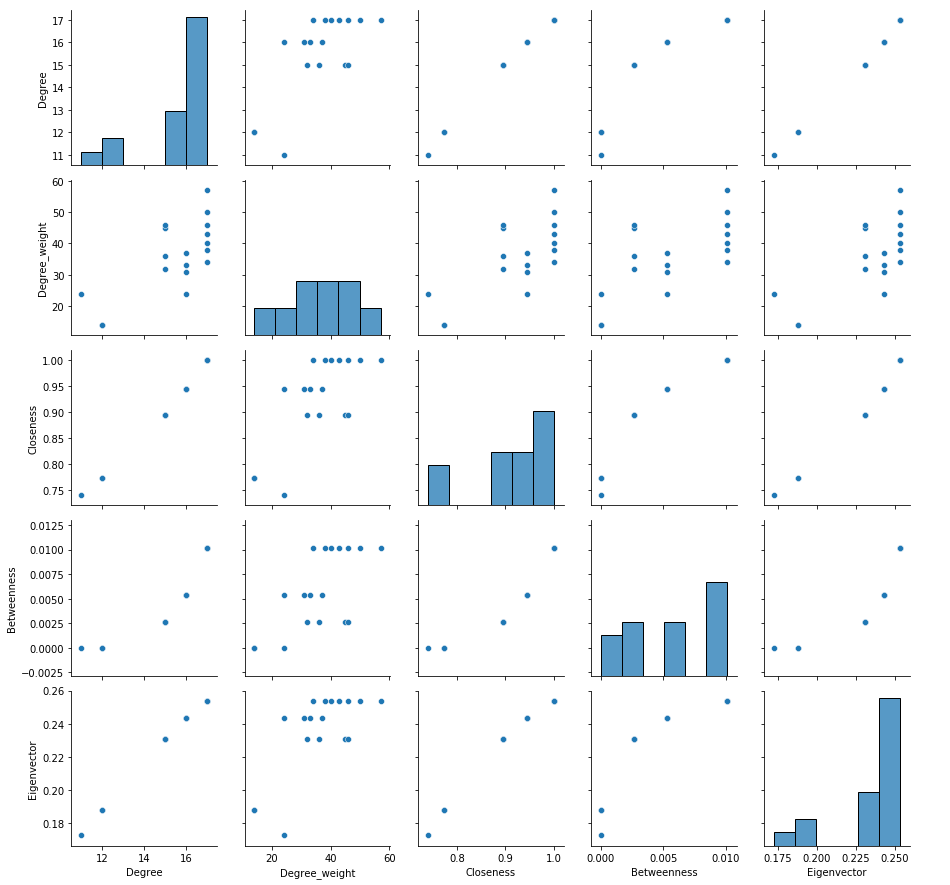

In [22]:
g = sns.PairGrid(df)
g.map_diag(sns.histplot)
g.map_offdiag(sns.scatterplot)
g.add_legend()